# Crime Data Cleaning (Table 2)

## Initial Data Cleaning

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in the dataset for crimes recorded in Victoria
vic_crimes = pd.read_csv("Data/crime_table2.csv", low_memory=False).dropna(how='any')
vic_crimes["Year"] = vic_crimes["Year"].astype(int)

In [3]:
# Get relevant columns
clean_crimes = vic_crimes[["Year", "Local Government Area", "Offence Division", "Offence Subdivision", 
                           "Offence Subgroup", "Incidents Recorded", "LGA Rate per 100,000 population"]]

## Crime Incidents in All LGA in 2023 (Bar Chart)

In [4]:
# Filter to only show data in 2023
crime_23 = clean_crimes.loc[clean_crimes["Year"] == 2023]

# Groupby LGA to analysis by incidents by LGA
crime_all_LGAs = crime_23.groupby("Local Government Area")["LGA Rate per 100,000 population"].sum().reset_index()
crime_all_LGAs_sorted = crime_all_LGAs.sort_values(by="LGA Rate per 100,000 population", ascending=True)

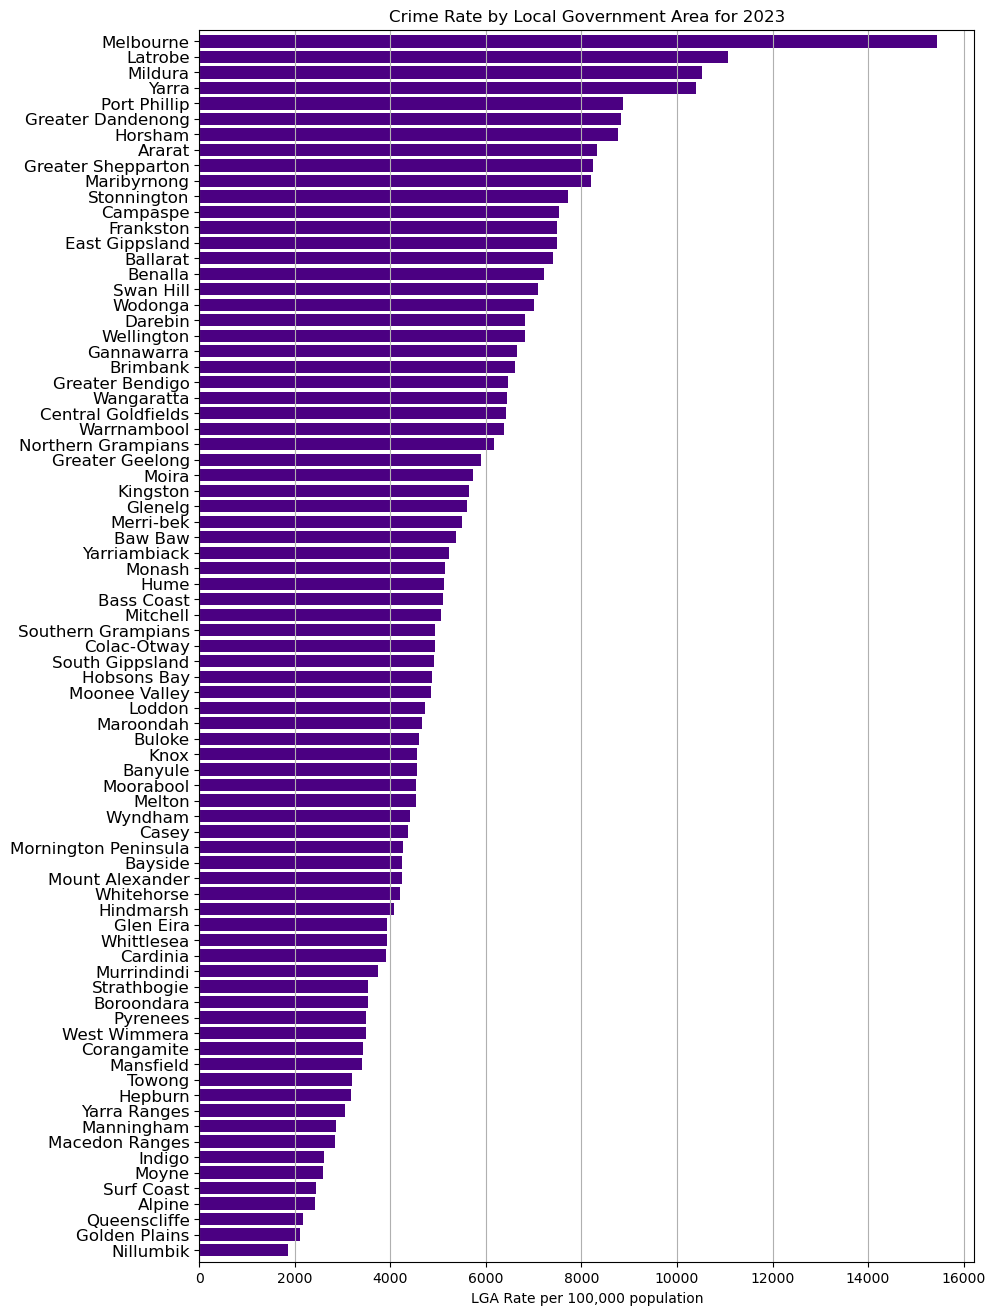

In [5]:
# Set figure size
plt.figure(figsize=(10, 16))

# Plot bar graph
plt.barh(crime_all_LGAs_sorted["Local Government Area"],
         crime_all_LGAs_sorted["LGA Rate per 100,000 population"],
         color='indigo')

# Format graph
plt.title("Crime Rate by Local Government Area for 2023")
plt.xlabel("LGA Rate per 100,000 population")
plt.yticks(crime_all_LGAs_sorted["Local Government Area"], fontsize=12)

# Set vertical grid lines
plt.grid(axis='x', linestyle='-')
plt.ylim(-0.75, len(crime_all_LGAs_sorted["Local Government Area"]) - 0.25)
plt.savefig('Graphs/crime_rate_2023.png', bbox_inches='tight')

plt.show()

## Top 10 LGAs Over the Years (2014-2023) (Line Chart)

In [6]:
# Groupby Years
y_group = clean_crimes.groupby(["Year", "Local Government Area"])["LGA Rate per 100,000 population"]
y_df = pd.DataFrame(y_group.sum()).reset_index()

In [7]:
# Filter DataFrame for 2023
y23 = y_df.loc[(y_df['Year'] == 2023), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]

In [8]:
# Clean DataFrame for appending to list
y23_index = y23.set_index('Local Government Area')
y23_index = pd.DataFrame(y23_index['LGA Rate per 100,000 population'])

In [9]:
# Create list of top 10 from 2023
lga_10 = []

# Loop through DataFrame to add into list
for index, rate in y23_index.iterrows():
    if index not in lga_10:
        lga_10.append(index)

In [10]:
# Sort through y_df to only include LGAs in lga_10
lga_top_10 = y_df[y_df['Local Government Area'].isin(lga_10)]
lga_top_10_index = lga_top_10.set_index(['Year', 'Local Government Area'])
lga_top_unstack = lga_top_10_index.unstack()
lga_top_unstack.columns = lga_top_unstack.columns.droplevel()

In [11]:
# Graph lga_top_10
# Get list of years for x-axis
years = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

# Create variables for each LGA
melbourne = 'Melbourne'
latrobe = 'Latrobe'
mildura = 'Mildura'
yarra = 'Yarra'
phillip = 'Port Phillip'
dandenong = 'Greater Dandenong'
horsham = 'Horsham'
ararat = 'Ararat'
shepparton = 'Greater Shepparton'
maribyrnong = 'Maribyrnong'

In [12]:
# Create series for each LGA
melbourne_ot = lga_top_unstack.loc[years, melbourne]
latrobe_ot = lga_top_unstack.loc[years, latrobe]
mildura_ot = lga_top_unstack.loc[years, mildura]
yarra_ot = lga_top_unstack.loc[years, yarra]
phillip_ot = lga_top_unstack.loc[years, phillip]
dandenong_ot = lga_top_unstack.loc[years, dandenong]
horsham_ot = lga_top_unstack.loc[years, horsham]
ararat_ot = lga_top_unstack.loc[years, ararat]
shepparton_ot = lga_top_unstack.loc[years, shepparton]
maribyrnong_ot = lga_top_unstack.loc[years, maribyrnong]

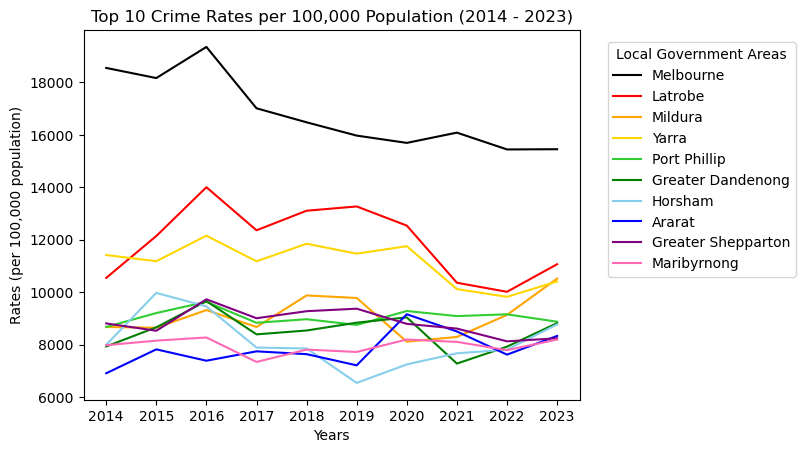

In [37]:
# Plot graphs
plt.plot(years, melbourne_ot, color='black', label=melbourne)
plt.plot(years, latrobe_ot, color='red', label=latrobe)
plt.plot(years, mildura_ot, color='orange', label=mildura)
plt.plot(years, yarra_ot, color='gold', label=yarra)
plt.plot(years, phillip_ot, color='limegreen', label=phillip)
plt.plot(years, dandenong_ot, color='green', label=dandenong)
plt.plot(years, horsham_ot, color='skyblue', label=horsham)
plt.plot(years, ararat_ot, color='blue', label=ararat)
plt.plot(years, shepparton_ot, color='purple', label=shepparton)
plt.plot(years, maribyrnong_ot, color='hotpink', label=maribyrnong)

# Format graph
plt.title("Top 10 Crime Rates per 100,000 Population (2014 - 2023)")
plt.xlabel("Years")
plt.ylabel("Rates (per 100,000 population)")
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.legend(bbox_to_anchor=(1.45,0.65), loc="center right", title="Local Government Areas")

# Save graph
plt.savefig("Graphs/top_10_lga_over_time.png", format='png', bbox_inches='tight')

plt.show()

## Top 10 LGA per 100,000 Population in 2023 (Bar Chart)

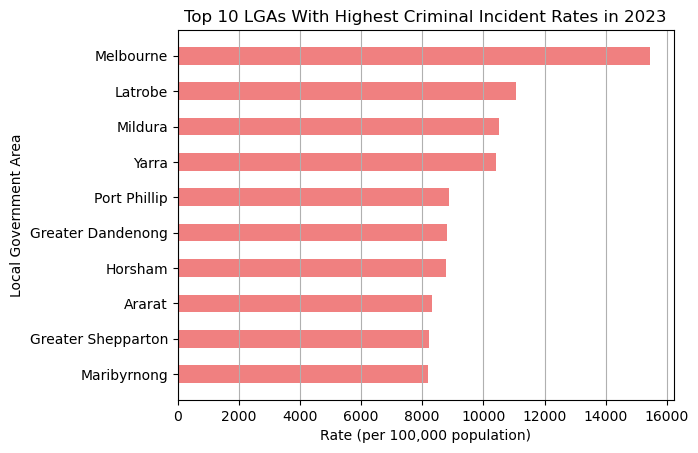

In [14]:
# Plot horizontal bar graph
plt.barh(y23["Local Government Area"],y23["LGA Rate per 100,000 population"], height=0.5, color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel("Rate (per 100,000 population)")
plt.ylabel("Local Government Area")
plt.title("Top 10 LGAs With Highest Criminal Incident Rates in 2023")
plt.grid(axis='x', linestyle='-')

# Save graph
plt.savefig("Graphs/top_10_lga_2023.png", format='png', bbox_inches='tight')

plt.show()

## Top 10 Offence Subgroup in 2023 (Bar Chart)

In [15]:
# Groupby offence subgroup to sum lga rate
subgroup_rate = crime_23.groupby("Offence Subgroup")
subgroup_rate_sum = pd.DataFrame(subgroup_rate["LGA Rate per 100,000 population"].sum())

In [16]:
# Sort DataFrame by descending rate
subgroup_top = subgroup_rate_sum.sort_values(by="LGA Rate per 100,000 population", 
                                             ascending=False).iloc[:10,:]

In [17]:
# Add index to list to rename
offence = []
for index, rate in subgroup_top.itertuples():
    offence.append(index)

In [18]:
# Rename items in list
offence[0] = "Steal from a motor vehicle"
offence[1] = "Other theft"
offence[2] = "Criminal damage"
offence[3] = "Breach family violence order"
offence[4] = "Breach bail conditions"
offence[5] = "Residential non-aggravated burglary"
offence[6] = "Steal from a retail store"
offence[7] = "Obtain benefit by deception"
offence[8] = "FV Common assault"
offence[9] = "Non-residential non-aggravated burglary"

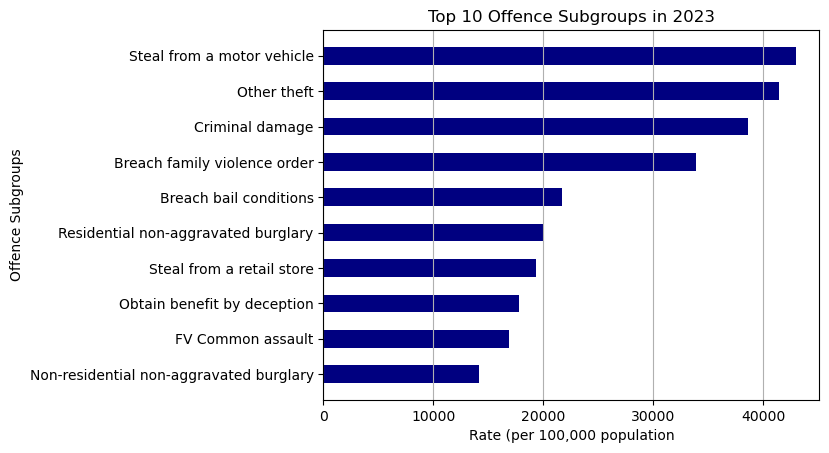

In [19]:
# Plot bar graph (horizontal)
plt.barh(offence, subgroup_top["LGA Rate per 100,000 population"], height=0.5, color='navy')
plt.gca().invert_yaxis()
plt.title("Top 10 Offence Subgroups in 2023")
plt.xlabel("Rate (per 100,000 population")
plt.ylabel("Offence Subgroups")
plt.grid(axis='x', linestyle='-')

# Save graph
plt.savefig("Graphs/top_10_os_2023.png", format='png', bbox_inches='tight')

plt.show()

## Top 10 Offence Subgroups (2014-2023) (Line Chart)

In [20]:
# Groupby Years
os_group = clean_crimes.groupby(["Year", "Offence Subgroup"])["LGA Rate per 100,000 population"]
os_df = pd.DataFrame(os_group.sum()).reset_index()

In [21]:
# Filter DataFrame for 2023
y23_os = os_df.loc[(os_df['Year'] == 2023), :].sort_values(
    by="LGA Rate per 100,000 population", ascending=False).iloc[:10,:]

In [22]:
# Clean DataFrame for appending to list
os_index = y23_os.set_index('Offence Subgroup')
os_index = pd.DataFrame(os_index['LGA Rate per 100,000 population'])

In [23]:
# Create list of top 10 from 2023
os_10 = []

# Loop through DataFrame to add into list
for index, rate in os_index.itertuples():
    os_10.append(index)

In [24]:
# Sort through y_df to only include LGAs in lga_10
os_10 = os_df[os_df['Offence Subgroup'].isin(os_10)]
os_10_index = os_10.set_index(['Year', 'Offence Subgroup'])
os_10_unstack = os_10_index.unstack()
os_10_unstack.columns = os_10_unstack.columns.droplevel()

In [25]:
# Create variables for each LGA
assault = 'A231 FV Common assault'
criminal = 'B21 Criminal damage'
res_burglary = 'B321 Residential non-aggravated burglary'
burglary = 'B322 Non-residential non-aggravated burglary'
vehicle = 'B42 Steal from a motor vehicle'
retail = 'B43 Steal from a retail store'
theft = 'B49 Other theft'
deception = 'B53 Obtain benefit by deception'
family = 'E21 Breach family violence order'
bail = 'E23 Breach bail conditions'

In [26]:
# Create series for each LGA
assault_ot = os_10_unstack.loc[years, assault]
criminal_ot = os_10_unstack.loc[years, criminal]
res_burglary_ot = os_10_unstack.loc[years, res_burglary]
burglary_ot = os_10_unstack.loc[years, burglary]
vehicle_ot = os_10_unstack.loc[years, vehicle]
retail_ot = os_10_unstack.loc[years, retail]
theft_ot = os_10_unstack.loc[years, theft]
deception_ot = os_10_unstack.loc[years, deception]
family_ot = os_10_unstack.loc[years, family]
bail_ot = os_10_unstack.loc[years, bail]

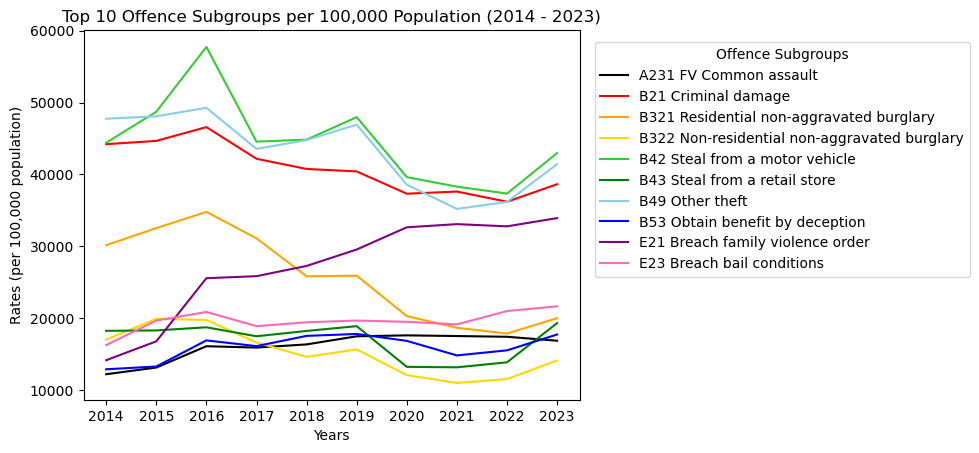

In [27]:
# Plot graphs
plt.plot(years, assault_ot, color='black', label=assault)
plt.plot(years, criminal_ot, color='red', label=criminal)
plt.plot(years, res_burglary_ot, color='orange', label=res_burglary)
plt.plot(years, burglary_ot, color='gold', label=burglary)
plt.plot(years, vehicle_ot, color='limegreen', label=vehicle)
plt.plot(years, retail_ot, color='green', label=retail)
plt.plot(years, theft_ot, color='skyblue', label=theft)
plt.plot(years, deception_ot, color='blue', label=deception)
plt.plot(years, family_ot, color='purple', label=family)
plt.plot(years, bail_ot, color='hotpink', label=bail)

# Format graph
plt.title("Top 10 Offence Subgroups per 100,000 Population (2014 - 2023)")
plt.xlabel("Years")
plt.ylabel("Rates (per 100,000 population)")
plt.xticks(np.arange(min(years), max(years)+1, 1.0))
plt.legend(bbox_to_anchor=(1.8,0.65), loc="center right", title="Offence Subgroups")

# Save graph
plt.savefig("Graphs/top_10_os_over_time.png", format='png', bbox_inches='tight')

plt.show()

## Distribution of Crime Types in 2023 (Pie Chart)

In [28]:
# Use crime_23 to make pie chart of crime divisions
# Groupby crime divisions
divisions_group = crime_23.groupby("Offence Division")
division_incidents = pd.DataFrame(divisions_group["Incidents Recorded"].sum())

In [29]:
# Get total number of incidents
total_incidents = division_incidents["Incidents Recorded"].sum()

# Create lists
division = []
incidents = []

# Add to list
for index, row in division_incidents.itertuples():
    division.append(index)
    percentages = round((row / total_incidents * 100),2)
    incidents.append(percentages)

In [30]:
# Rename names in list
division[0] = "Crimes Against the Person"
division[1] = "Property & Deception offences"
division[2] = "Drug Offences"
division[3] = "Public Order & Security Offences"
division[4] = "Justice Procedures Offences"
division[5] = "Other Offences"

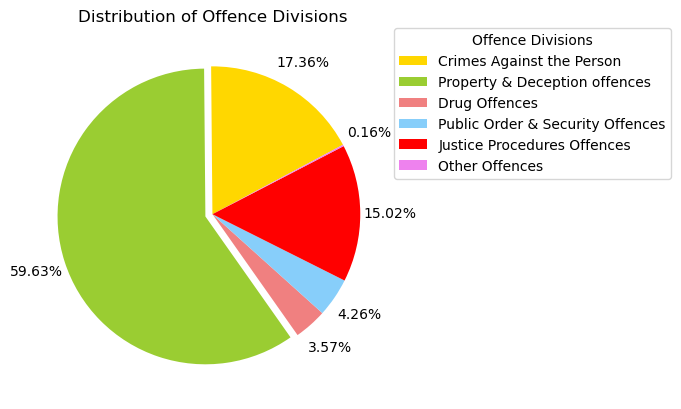

In [31]:
# Create pie chart for crime divisions
colours = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "red", "violet"]
explode = [0,0.05,0,0,0,0]
plt.pie(incidents, autopct='%.02f%%', colors = colours, radius=1,
        startangle=28, explode=explode, pctdistance=1.2)
plt.title("Distribution of Offence Divisions")
plt.legend(division, bbox_to_anchor=(1.76,0.8), loc="center right", title="Offence Divisions")

# Save graph
plt.savefig("Graphs/offence_division_distribution.png", format='png', bbox_inches='tight')

plt.show()